https://machinebox.io/docs/tagbox/recognizing-images

Have an attribute for every identified tag. Allow configurable tags which are always an attribute but have confidence = 0.0 if not detected, allowing a [template binary sensor](https://www.home-assistant.io/components/binary_sensor.template/). 

In [1]:
import requests
import operator
import os
import io
import glob
import base64
import pathlib
import time
from PIL import Image
import json
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

def print_json(json_data):
    PrettyPrinter().pprint(json_data)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [49]:
IP = 'localhost'
PORT = '8080'
CLASSIFIER = 'tagbox'
URL_CHECK = "http://{}:{}/{}/check".format(IP, PORT, CLASSIFIER)
print(URL_CHECK)
#IMG_FILE = "bird.jpg"
IMG_FILE = "not_bird.jpg"
FIG_SIZE = (12, 8)
ROUNDING_DECIMALS = 3

http://localhost:8080/tagbox/check


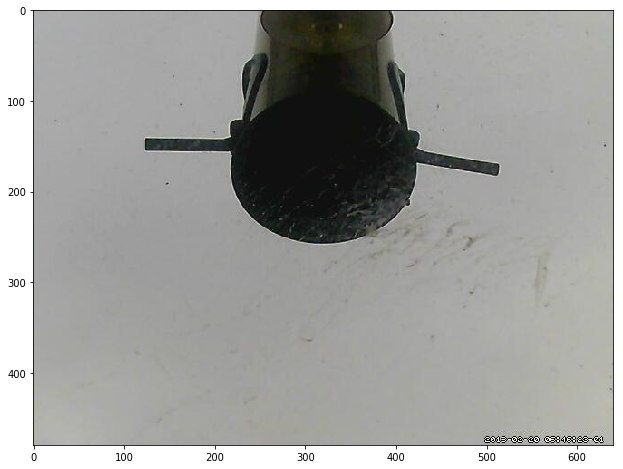

In [50]:
img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

## Post the file

In [51]:
%%time
files = {
#    'file': open('/Users/robincole/Documents/Github/tagbox_python/dogs/dog1.jpg', 'rb'),
    'file': open(IMG_FILE, 'rb'),
}

response = requests.post(URL_CHECK, files=files).json()

CPU times: user 4.48 ms, sys: 2.81 ms, total: 7.29 ms
Wall time: 497 ms


In [52]:
print_json(response)

{'custom_tags': [{'confidence': 0.8768369710977586,
                  'id': '10-2018_02_05_10_28_59-motion-capture.jpg',
                  'tag': 'not_bird'},
                 {'confidence': 0.8252961625171193,
                  'id': '03-2018_02_05_07_57_53-motion-capture.jpg',
                  'tag': 'bird'}],
 'success': True,
 'tags': []}


In [39]:
response['success']

True

In [40]:
response['tags']

[]

In [41]:
response['tags'][0]['tag'] # The most likely tag

IndexError: list index out of range

In [73]:
response['tags'][0]['confidence'] > 0.0

IndexError: list index out of range

In [74]:
tags = {tag['tag']:round(tag['confidence'], ROUNDING_DECIMALS) for tag in response['tags']}
tags

{}

In [75]:
confident_tags = [k for (k,v) in tags.items() if v > 0.8]

In [76]:
len(confident_tags)

0

In [77]:
if response['custom_tags']:
    custom_tags = {tag['tag']:round(tag['confidence'], ROUNDING_DECIMALS) for tag in response['custom_tags']}
    tags.update(custom_tags)

In [78]:
tags

{}

Get the most likely tag

In [79]:
max(tags.keys(), key=(lambda k: tags[k]))

ValueError: max() arg is an empty sequence

## Custom tags
Must post images with custom tags to recognise these objects.

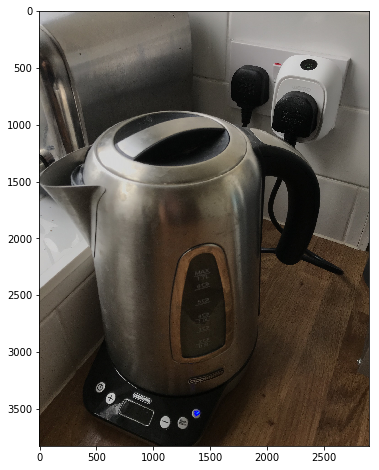

In [6]:
TAG = 'kettle'
FILE_KETTLE = '/users/robincole/pictures/kettle.jpg'
img = plt.imread(FILE_KETTLE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [7]:
URL_TEACH = "http://{}:{}/{}/teach".format(IP, PORT, CLASSIFIER)
print(URL_TEACH)

http://localhost:8080/tagbox/teach


In [41]:
%%time
tag = 'kettle'
file_path = FILE_KETTLE

files = {
    'file': open(file_path, 'rb'),
}
data = {'tag': tag, "id": 'some_id'},

response = requests.post(URL_TEACH, files=files, data=data)

CPU times: user 4.12 ms, sys: 3.89 ms, total: 8.01 ms
Wall time: 30.4 ms


In [42]:
print_json(response)

<Response [400]>


In [43]:
response.text

'With the FREE plan you are, only able to teach 20 images, visit http://machinebox.io to get a suscription'

In [37]:
def teach_tag_by_file(teach_url, tag, file_path):
    """Teach tagbox a single tag using a single file."""
    file_name = file_path.split("/")[-1]
    file = {'file': open(file_path, 'rb')}
    data = {'tag': tag, "id": file_name}
    
    response = requests.post(teach_url, files=file, data=data)
    
    if response.status_code == 200:
        print("File:{} tagged with tag:{}".format(file_name, tag))
        return True

    elif response.status_code == 400:
        print("Tagging of file:{} failed with message:".format(
            file_name, response.text))
        return False

In [38]:
teach_tag_by_file(URL_TEACH, tag='kettle', file_path=FILE_KETTLE)

Tagging of file:kettle.jpg failed with message:


False

Let's check it is tagged

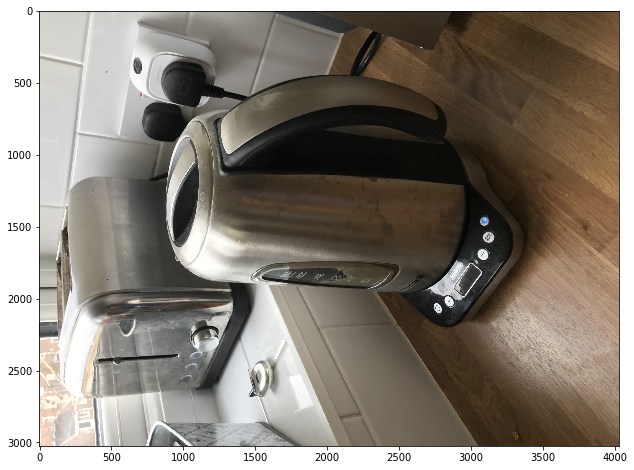

In [10]:
FILE_KETTLE_2 = '/users/robincole/pictures/kettle_2.jpg'
img = plt.imread(FILE_KETTLE_2)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [11]:
%%time
files = {
    'file': (FILE_KETTLE_2, open(FILE_KETTLE_2, 'rb')),
}
response = requests.post(URL_CHECK, files=files).json()

CPU times: user 3.77 ms, sys: 3.9 ms, total: 7.67 ms
Wall time: 586 ms


In [12]:
print_json(response)

{'custom_tags': [{'confidence': 0.6131968686021452,
                  'id': 'kettle.jpg',
                  'tag': 'kettle'}],
 'success': True,
 'tags': []}


It found the kettle with 61% confidence

In [13]:
if response['custom_tags']:
    custom_tags = {tag['tag']:tag['confidence'] for tag in response['custom_tags']}
custom_tags

{'kettle': 0.6131968686021452}

## Dev stuff

In [34]:
tags = ['kettle', 'keys']
default_tags = {tag: '0.0' for tag in tags}
default_tags

{'kettle': '0.0', 'keys': '0.0'}

In [35]:
def get_default_tags(tags_list):
    return {tag: '0.0' for tag in tags_list}

In [36]:
bla = {}
if bla:
    print(True)

In [37]:
timer_start = time.perf_counter()

In [38]:
elapsed = time.perf_counter() - timer_start

In [39]:
round(elapsed, ROUNDING_DECIMALS)

0.385

In [40]:
tags = {'a':0, 'b':0}
max(tags.keys(), key=(lambda k: tags[k]))

'a'

In [41]:
if tags:
    print(True)

True


In [17]:
def list_folders(directiory='.'):
    """Returns a list of folders in a dir, defaults to current dir."""
    folders= [dir for dir in os.listdir(directiory) 
            if os.path.isdir(os.path.join(directiory, dir)) 
            and not dir.startswith(directiory)
            and not dir.startswith('.')]
    folders.sort(key=str.lower)
    return folders

In [20]:
folders = list_folders('/Users/robincole/Documents/Github/tagbox_python')
folders[0]

'cats'

In [22]:
os.listdir(os.path.join('/Users/robincole/Documents/Github/tagbox_python', folders[0]))

['.DS_Store', 'cat1.jpg', 'cat2.jpg', 'cat3.jpg', 'cat4.jpg', 'cat5.jpg']

In [31]:
os.getcwd()

'/Users/robincole/Documents/Github/HASS-Machinebox-Tagbox'

In [33]:
?glob

## Check Tagbox health

In [14]:
health_api_url = "http://{}:{}/readyz".format(IP, PORT)
health_api_url

'http://localhost:8080/readyz'

In [35]:
def test_tagbox_health():
    """Check that Tagbox is reachable"""
    try:
        response = requests.get(health_api_url)
        if response.status_code == 200:
            print("Tagbox health-check passed")               
            return True
        else:
            print("Tagbox health-check failed")            
            print(response.status_code)
            return False
    except requests.exceptions.RequestException as exception:
        print("Tagbox is unreachable")
        print(exception)

In [36]:
if test_tagbox_health():
    print('healthy')

Tagbox health-check passed
healthy


In [63]:
os.getcwd()

'/Users/robincole/Documents/Github/HASS-Machinebox-Tagbox'

In [64]:
valid = ('.jpg', '.png', '.jpeg')

In [65]:
valid

('.jpg', '.png', '.jpeg')

In [61]:
os.listdir(path='.')

['dog.jpg',
 'Development.ipynb',
 '.DS_Store',
 'LICENSE',
 'tagbox_usage.png',
 'custom_components',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git']

In [58]:
next(os.walk('.'))[1]

['custom_components', '.ipynb_checkpoints', '.git']